# Credit Card Fraud Detection
#### By: Juan Saracho

### Load Dataset

In [2]:
import pandas as pd
import numpy as np

df_base = pd.read_csv(r'C:\Users\sarac\OneDrive\Documents\ANA630\Credit Card Fraud data.csv')
df_base.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500,0,INTERNET,3.775225,macintosh,1,1,0,7


### Create working copy of Dataset

In [3]:
df_copy = df_base.copy()
df_copy.info()

#df_copy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        500000 non-null  int64  
 1   income                            500000 non-null  float64
 2   name_email_similarity             500000 non-null  float64
 3   prev_address_months_count         500000 non-null  int64  
 4   current_address_months_count      500000 non-null  int64  
 5   customer_age                      500000 non-null  int64  
 6   days_since_request                500000 non-null  float64
 7   intended_balcon_amount            500000 non-null  float64
 8   payment_type                      500000 non-null  object 
 9   zip_count_4w                      500000 non-null  int64  
 10  velocity_6h                       500000 non-null  float64
 11  velocity_24h                      500000 non-null  f

### Correlation Matrix

In [10]:
# We can drop device_fraud_count because it's all zeros
df1 = df_copy.drop('device_fraud_count', axis=1)

# Create a correlation matrix
corr_matrix = df1.corr()
corr_matrix = pd.DataFrame(corr_matrix)
corr_matrix.sort_values(by='fraud_bool', ascending=False)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
fraud_bool,1.000000,0.044778,-0.035871,-0.025676,0.035561,0.060597,-0.000158,-0.025789,0.004798,-0.017484,...,-0.031515,-0.014631,-0.001954,-0.033919,0.068905,0.017683,0.006900,-0.048566,0.036083,0.018148
credit_risk_score,0.070549,0.165011,0.045603,-0.006643,0.094806,0.169181,-0.099006,0.013771,-0.100924,-0.129537,...,0.013644,-0.004658,-0.057235,0.147941,0.631224,0.022458,-0.041155,-0.021092,-0.048321,0.163359
proposed_credit_limit,0.068905,0.105237,0.065911,-0.038649,0.153273,0.154206,-0.080203,0.063162,-0.028416,-0.041134,...,0.020595,-0.030973,-0.020578,0.116496,1.000000,0.025587,-0.014077,-0.027458,-0.025413,-0.024228
customer_age,0.060597,0.116811,-0.045001,-0.072912,0.161515,1.000000,-0.042366,-0.018900,-0.012843,-0.020617,...,0.220458,-0.163197,0.017118,0.101137,0.154206,0.003568,0.023240,-0.027276,0.028047,-0.008484
income,0.044778,1.000000,-0.038093,0.025756,-0.041153,0.116811,-0.013306,0.067278,-0.088673,-0.101200,...,0.023279,0.011897,0.006813,0.079935,0.105237,0.015917,-0.050700,-0.041356,-0.011947,0.132929
device_distinct_emails_8w,0.036083,-0.011947,-0.019036,0.009128,0.002213,0.028047,0.009261,-0.024479,0.025616,0.030438,...,0.008534,-0.043221,0.001450,-0.029372,-0.025413,0.008592,0.081730,-0.041804,1.000000,-0.049171
current_address_months_count,0.035561,-0.041153,0.050871,-0.272521,1.000000,0.161515,-0.062328,0.065616,0.059914,0.053713,...,0.141690,-0.101132,0.083518,0.068907,0.153273,-0.006730,-0.031591,-0.051943,0.002213,-0.092433
email_is_free,0.026221,-0.023876,-0.070744,-0.017008,-0.075850,-0.008467,0.012035,-0.014970,0.011968,0.012621,...,-0.019752,0.032186,0.003889,-0.031855,-0.030497,0.025952,0.040452,-0.030748,0.000743,-0.050679
month,0.018148,0.132929,-0.056949,0.050595,-0.092433,-0.008484,-0.034154,-0.056183,-0.273650,-0.367599,...,0.064102,0.040026,-0.015924,-0.002992,-0.024228,0.000562,-0.079121,0.052679,-0.049171,1.000000
foreign_request,0.017683,0.015917,-0.016221,0.017235,-0.006730,0.003568,0.001333,0.001992,0.007630,-0.009748,...,0.005178,-0.000616,-0.002236,0.004122,0.025587,1.000000,0.008927,-0.017775,0.008592,0.000562


### Dummy Variable creation

In [11]:
# categorical feature for dummy variables
cat_vars = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

# use pd.get_dummies to create one-hot encoded variables
df2 = pd.get_dummies(df1, columns=cat_vars)

# Main variables
X = df2.drop('fraud_bool', axis=1)
y = df2['fraud_bool']

# numeric features to scale
num_vars = X.columns

### Scaling Data using Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
num_var = df2[num_vars].values
df2[num_vars] = standard.fit_transform(num_var.reshape(-1,51))

# Scaled features
X_scaled = df2.drop('fraud_bool', axis=1)
y_scaled = df2['fraud_bool']

X_scaled.shape, y_scaled.shape

((500000, 51), (500000,))

### Principal Component Analysis

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=39)
transformed_data = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_.sum()

X_pca = pd.DataFrame(transformed_data)
y_pca = y_scaled

print(f"Total Explained Variance: ", explained_variance)

X_pca.shape, y_pca.shape

Total Explained Variance:  0.9444610218435764


((500000, 39), (500000,))

### SMOTE Sampling

In [15]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)

X_smote, y_smote = sm.fit_resample(df2.drop('fraud_bool', axis=1), df2['fraud_bool'])
smote_df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)

X_smote.shape, y_smote.shape

((989568, 51), (989568,))

In [117]:
smote_df['fraud_bool'].value_counts()

1    494784
0    494784
Name: fraud_bool, dtype: int64

## Logistic Regression

In [132]:
# Create our model function. We will apply this to all of our samples.

def LR_model(X,y):
    print("Partitioning Data...")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Data Successfully Partitioned!")
    
    print("Training Model...")
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(class_weight = 'balanced') # using the 'balanced' weighting method to help with data imbalances
    lr.fit(X_train, y_train)
    print("Model Trained Successfully!")

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print("------------Training Prediction--------------")
    y_preds = lr.predict(X_train)
    
    cf_matrix = confusion_matrix(y_train, y_preds)
    cm_df = pd.DataFrame(cf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    print(cm_df)
    
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    fig.suptitle(t="Confusion Matrix - Training",
                 color="red",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");
    
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")
    
    from dmba import regressionSummary
    print(f"Regression Summary:\n\n{regressionSummary(y_train, y_preds)}\n\n")

    print("------------Test Prediction--------------")

    y_preds =lr.predict(X_test)
    
    cf_matrix = confusion_matrix(y_test, y_preds)
    cm_df = pd.DataFrame(cf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    print(cm_df)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    fig.suptitle(t="Confusion Matrix - Test",
                 color="red",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");    
    
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")
    
    print(f"Regression Summary:\n\n{regressionSummary(y_test, y_preds)}\n\n")

### Logistic Regression on Normal sample

Partitioning Data...
Data Successfully Partitioned!
Training Model...


C:\Users\sarac\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Trained Successfully!
------------Training Prediction--------------
          Predicted 0  Predicted 1
Actual 0       270818       125011
Actual 1         1433         2738
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.99      0.68      0.81    395829
           1       0.02      0.66      0.04      4171

    accuracy                           0.68    400000
   macro avg       0.51      0.67      0.43    400000
weighted avg       0.98      0.68      0.80    400000




Regression statistics

               Mean Error (ME) : -0.3089
Root Mean Squared Error (RMSE) : 0.5622
     Mean Absolute Error (MAE) : 0.3161
Regression Summary:

None


------------Test Prediction--------------
          Predicted 0  Predicted 1
Actual 0        67840        31115
Actual 1          333          712
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      0.69      0.81     98955
           1   

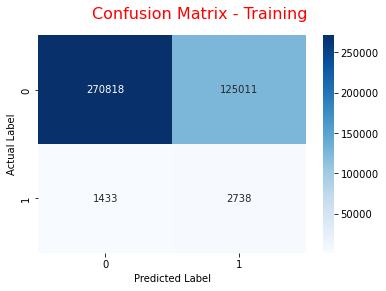

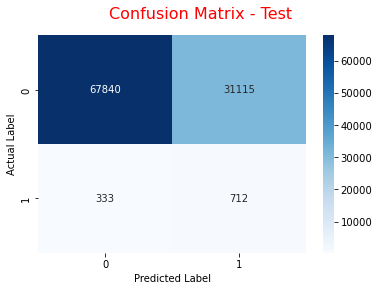

In [133]:
LR_model(X, y)

### Logistic Regression on Scaled sample

Partitioning Data...
Data Successfully Partitioned!
Training Model...
Model Trained Successfully!
------------Training Prediction--------------
          Predicted 0  Predicted 1
Actual 0       319797        76032
Actual 1          867         3304
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      0.81      0.89    395829
           1       0.04      0.79      0.08      4171

    accuracy                           0.81    400000
   macro avg       0.52      0.80      0.49    400000
weighted avg       0.99      0.81      0.88    400000




Regression statistics

               Mean Error (ME) : -0.1879
Root Mean Squared Error (RMSE) : 0.4385
     Mean Absolute Error (MAE) : 0.1922
Regression Summary:

None


------------Test Prediction--------------
          Predicted 0  Predicted 1
Actual 0        80047        18908
Actual 1          197          848
Classfifcation Report:

              precision    recall  f1-score   support


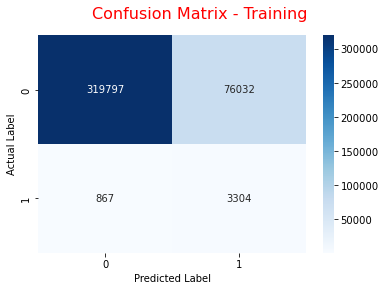

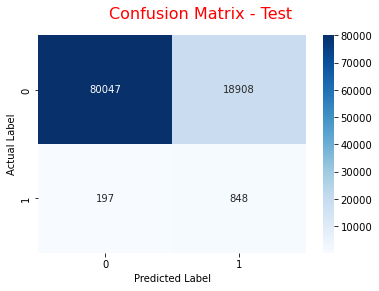

In [134]:
LR_model(X_scaled, y_scaled)

### Logistic Regression on PCA sample

Partitioning Data...
Data Successfully Partitioned!
Training Model...
Model Trained Successfully!
------------Training Prediction--------------
          Predicted 0  Predicted 1
Actual 0       319242        76587
Actual 1          872         3299
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      0.81      0.89    395829
           1       0.04      0.79      0.08      4171

    accuracy                           0.81    400000
   macro avg       0.52      0.80      0.49    400000
weighted avg       0.99      0.81      0.88    400000




Regression statistics

               Mean Error (ME) : -0.1893
Root Mean Squared Error (RMSE) : 0.4401
     Mean Absolute Error (MAE) : 0.1936
Regression Summary:

None


------------Test Prediction--------------
          Predicted 0  Predicted 1
Actual 0        79802        19153
Actual 1          205          840
Classfifcation Report:

              precision    recall  f1-score   support


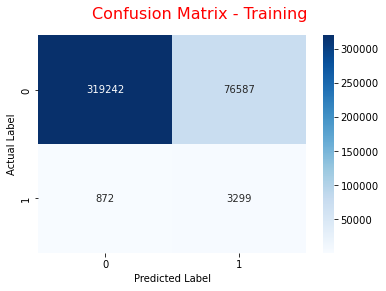

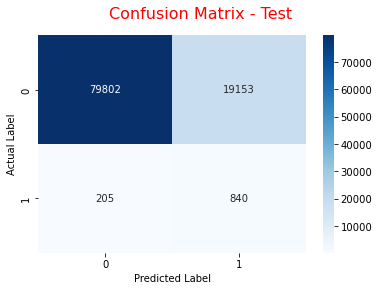

In [135]:
LR_model(X_pca, y_pca)

### Logistic Regression on SMOTE sample

Partitioning Data...
Data Successfully Partitioned!
Training Model...
Model Trained Successfully!
------------Training Prediction--------------
          Predicted 0  Predicted 1
Actual 0       325037        70466
Actual 1        70581       325570
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.82      0.82      0.82    395503
           1       0.82      0.82      0.82    396151

    accuracy                           0.82    791654
   macro avg       0.82      0.82      0.82    791654
weighted avg       0.82      0.82      0.82    791654




Regression statistics

               Mean Error (ME) : 0.0001
Root Mean Squared Error (RMSE) : 0.4221
     Mean Absolute Error (MAE) : 0.1782
Regression Summary:

None


------------Test Prediction--------------
          Predicted 0  Predicted 1
Actual 0        81353        17928
Actual 1        17398        81235
Classfifcation Report:

              precision    recall  f1-score   support



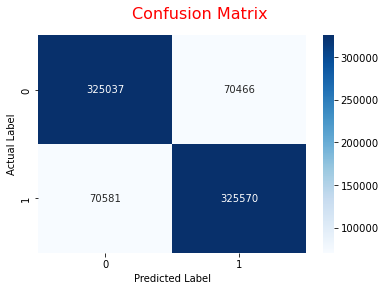

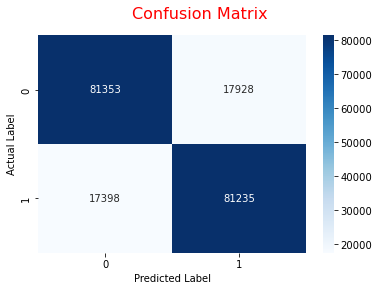

In [128]:
LR_model(X_smote, y_smote)

## Naive Bayes

In [130]:
# Create our model function. We will apply this to all of our samples.

def NB_model(X,y):
    print("Partitioning Data...")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Data Successfully Partitioned!")
    
    print("Training Model...")
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    print("Model Trained Successfully!")

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print("------------Training Prediction--------------")
    y_preds = gnb.predict(X_train)
    
    cf_matrix = confusion_matrix(y_train, y_preds)
    cm_df = pd.DataFrame(cf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    print(cm_df)
    
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    fig.suptitle(t="Confusion Matrix - Training",
                 color="red",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");
    
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")
    
    from dmba import regressionSummary
    print(f"Regression Summary:\n\n{regressionSummary(y_train, y_preds)}\n\n")

    print("------------Test Prediction--------------")

    y_preds =gnb.predict(X_test)
    
    cf_matrix = confusion_matrix(y_test, y_preds)
    cm_df = pd.DataFrame(cf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    print(cm_df)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    fig.suptitle(t="Confusion Matrix - Test",
                 color="red",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");    
    
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    print(f"Regression Summary:\n\n{regressionSummary(y_test, y_preds)}\n\n")

### Naive Bayes on Normal sample

Partitioning Data...
Data Successfully Partitioned!
Training Model...
Model Trained Successfully!
------------Training Prediction--------------
          Predicted 0  Predicted 1
Actual 0       357686        38143
Actual 1         1809         2362
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.99      0.90      0.95    395829
           1       0.06      0.57      0.11      4171

    accuracy                           0.90    400000
   macro avg       0.53      0.73      0.53    400000
weighted avg       0.99      0.90      0.94    400000




Regression statistics

               Mean Error (ME) : -0.0908
Root Mean Squared Error (RMSE) : 0.3160
     Mean Absolute Error (MAE) : 0.0999
Regression Summary:

None


------------Test Prediction--------------
          Predicted 0  Predicted 1
Actual 0        89410         9545
Actual 1          447          598
Classfifcation Report:

              precision    recall  f1-score   support


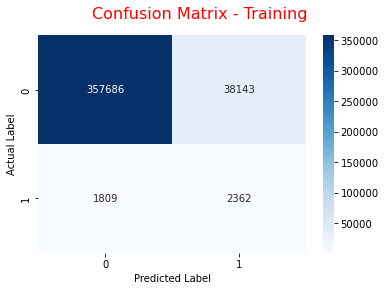

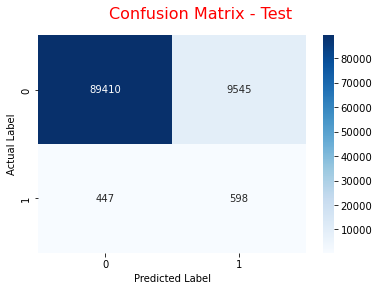

In [141]:
NB_model(X, y)

### Naive Bayes on Scaled sample

Partitioning Data...
Data Successfully Partitioned!
Training Model...
Model Trained Successfully!
------------Training Prediction--------------
          Predicted 0  Predicted 1
Actual 0        44272       351557
Actual 1          102         4069
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      0.11      0.20    395829
           1       0.01      0.98      0.02      4171

    accuracy                           0.12    400000
   macro avg       0.50      0.54      0.11    400000
weighted avg       0.99      0.12      0.20    400000




Regression statistics

               Mean Error (ME) : -0.8786
Root Mean Squared Error (RMSE) : 0.9376
     Mean Absolute Error (MAE) : 0.8791
Regression Summary:

None


------------Test Prediction--------------
          Predicted 0  Predicted 1
Actual 0        11192        87763
Actual 1           25         1020
Classfifcation Report:

              precision    recall  f1-score   support


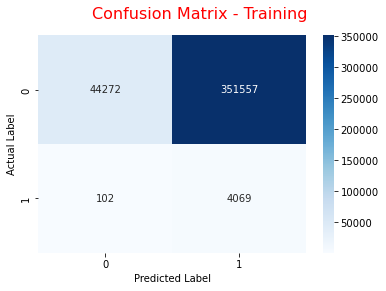

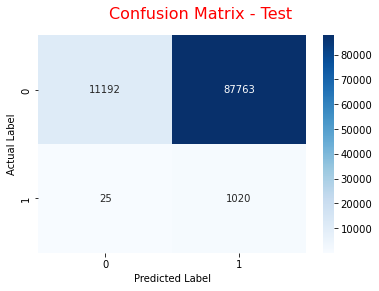

In [142]:
NB_model(X_scaled, y_scaled)

### Naive Bayes on PCA sample

Partitioning Data...
Data Successfully Partitioned!
Training Model...
Model Trained Successfully!
------------Training Prediction--------------
          Predicted 0  Predicted 1
Actual 0       381456        14373
Actual 1         3084         1087
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    395829
           1       0.07      0.26      0.11      4171

    accuracy                           0.96    400000
   macro avg       0.53      0.61      0.54    400000
weighted avg       0.98      0.96      0.97    400000




Regression statistics

               Mean Error (ME) : -0.0282
Root Mean Squared Error (RMSE) : 0.2089
     Mean Absolute Error (MAE) : 0.0436
Regression Summary:

None


------------Test Prediction--------------
          Predicted 0  Predicted 1
Actual 0        95392         3563
Actual 1          772          273
Classfifcation Report:

              precision    recall  f1-score   support


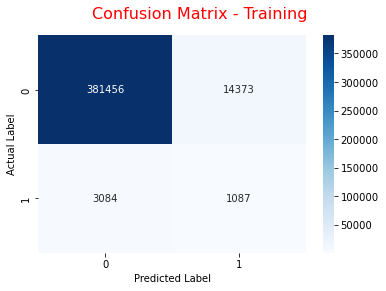

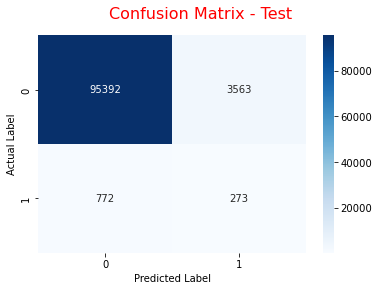

In [143]:
NB_model(X_pca, y_pca)

### Naive Bayes on SMOTE sample

Partitioning Data...
Data Successfully Partitioned!
Training Model...
Model Trained Successfully!
------------Training Prediction--------------
          Predicted 0  Predicted 1
Actual 0       264351       131152
Actual 1        54121       342030
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.83      0.67      0.74    395503
           1       0.72      0.86      0.79    396151

    accuracy                           0.77    791654
   macro avg       0.78      0.77      0.76    791654
weighted avg       0.78      0.77      0.76    791654




Regression statistics

               Mean Error (ME) : -0.0973
Root Mean Squared Error (RMSE) : 0.4838
     Mean Absolute Error (MAE) : 0.2340
Regression Summary:

None


------------Test Prediction--------------
          Predicted 0  Predicted 1
Actual 0        66182        33099
Actual 1        13363        85270
Classfifcation Report:

              precision    recall  f1-score   support


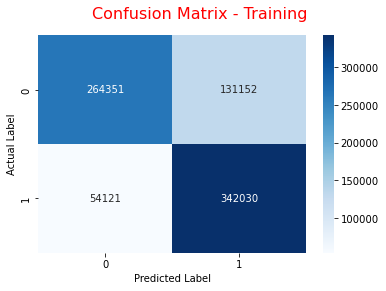

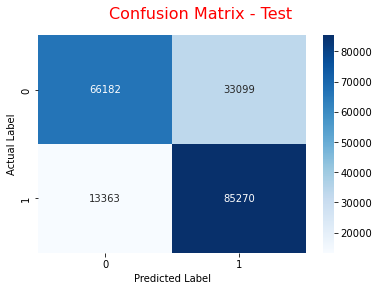

In [144]:
NB_model(X_smote, y_smote)

## XGBoost

In [145]:
# Create our model function. We will apply this to all of our samples.

def XGB_model(X,y):
    print("Partitioning Data...")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Data Successfully Partitioned!")
    
    print("Training Model...")
    from xgboost import XGBClassifier
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    print("Model Trained Successfully!")

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print("------------Training Prediction--------------")
    y_preds = xgb.predict(X_train)
    
    cf_matrix = confusion_matrix(y_train, y_preds)
    cm_df = pd.DataFrame(cf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    print(cm_df)
    
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    fig.suptitle(t="Confusion Matrix - Training",
                 color="red",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");
    
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")
        
    from dmba import regressionSummary
    print(f"Regression Summary:\n\n{regressionSummary(y_train, y_preds)}\n\n")

    print("------------Test Prediction--------------")

    y_preds =xgb.predict(X_test)
    
    cf_matrix = confusion_matrix(y_test, y_preds)
    cm_df = pd.DataFrame(cf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    print(cm_df)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    fig.suptitle(t="Confusion Matrix - Test",
                 color="red",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");    
    
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    print(f"Regression Summary:\n\n{regressionSummary(y_test, y_preds)}\n\n")    

### XGBoost on Normal sample

Partitioning Data...
Data Successfully Partitioned!
Training Model...
Model Trained Successfully!
------------Training Prediction--------------
          Predicted 0  Predicted 1
Actual 0       395786           43
Actual 1         3478          693
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    395829
           1       0.94      0.17      0.28      4171

    accuracy                           0.99    400000
   macro avg       0.97      0.58      0.64    400000
weighted avg       0.99      0.99      0.99    400000




Regression statistics

               Mean Error (ME) : 0.0086
Root Mean Squared Error (RMSE) : 0.0938
     Mean Absolute Error (MAE) : 0.0088
Regression Summary:

None


------------Test Prediction--------------
          Predicted 0  Predicted 1
Actual 0        98909           46
Actual 1          992           53
Classfifcation Report:

              precision    recall  f1-score   support



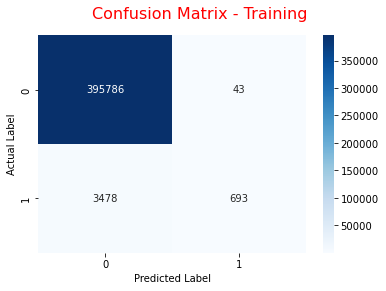

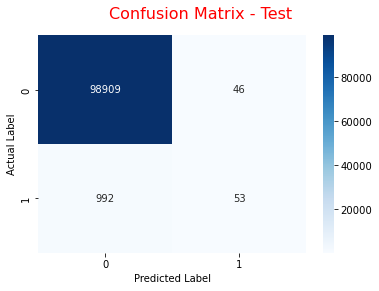

In [146]:
XGB_model(X,y)

### XGBoost on Scaled sample

Partitioning Data...
Data Successfully Partitioned!
Training Model...
Model Trained Successfully!
------------Training Prediction--------------
          Predicted 0  Predicted 1
Actual 0       395786           43
Actual 1         3478          693
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    395829
           1       0.94      0.17      0.28      4171

    accuracy                           0.99    400000
   macro avg       0.97      0.58      0.64    400000
weighted avg       0.99      0.99      0.99    400000




Regression statistics

               Mean Error (ME) : 0.0086
Root Mean Squared Error (RMSE) : 0.0938
     Mean Absolute Error (MAE) : 0.0088
Regression Summary:

None


------------Test Prediction--------------
          Predicted 0  Predicted 1
Actual 0        98909           46
Actual 1          992           53
Classfifcation Report:

              precision    recall  f1-score   support



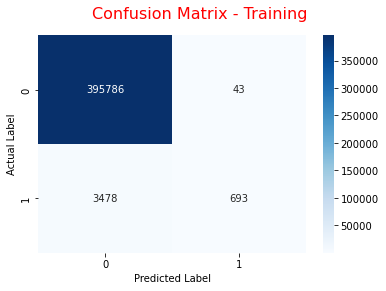

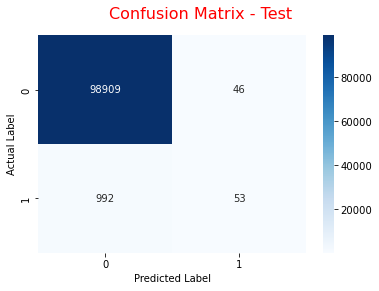

In [147]:
XGB_model(X_scaled,y_scaled)

### XGBoost on PCA sample

Partitioning Data...
Data Successfully Partitioned!
Training Model...
Model Trained Successfully!
------------Training Prediction--------------
          Predicted 0  Predicted 1
Actual 0       395814           15
Actual 1         3374          797
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    395829
           1       0.98      0.19      0.32      4171

    accuracy                           0.99    400000
   macro avg       0.99      0.60      0.66    400000
weighted avg       0.99      0.99      0.99    400000




Regression statistics

               Mean Error (ME) : 0.0084
Root Mean Squared Error (RMSE) : 0.0920
     Mean Absolute Error (MAE) : 0.0085
Regression Summary:

None


------------Test Prediction--------------
          Predicted 0  Predicted 1
Actual 0        98921           34
Actual 1         1017           28
Classfifcation Report:

              precision    recall  f1-score   support



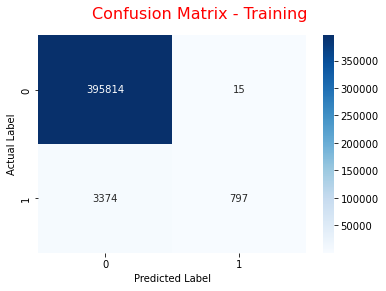

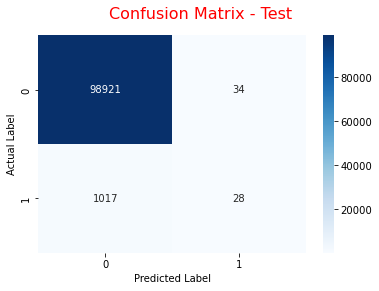

In [148]:
XGB_model(X_pca,y_pca)

### XGBoost on SMOTE sample

Partitioning Data...
Data Successfully Partitioned!
Training Model...
Model Trained Successfully!
------------Training Prediction--------------
          Predicted 0  Predicted 1
Actual 0       395325          178
Actual 1         3735       392416
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    395503
           1       1.00      0.99      1.00    396151

    accuracy                           1.00    791654
   macro avg       1.00      1.00      1.00    791654
weighted avg       1.00      1.00      1.00    791654




Regression statistics

               Mean Error (ME) : 0.0045
Root Mean Squared Error (RMSE) : 0.0703
     Mean Absolute Error (MAE) : 0.0049
Regression Summary:

None


------------Test Prediction--------------
          Predicted 0  Predicted 1
Actual 0        99187           94
Actual 1          998        97635
Classfifcation Report:

              precision    recall  f1-score   support



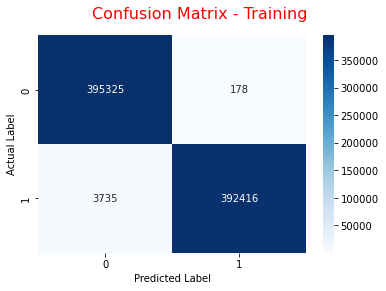

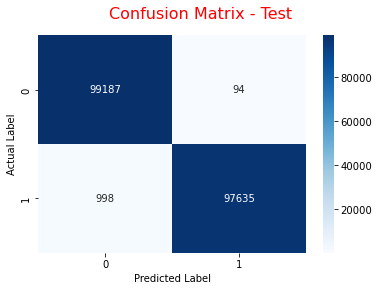

In [149]:
XGB_model(X_smote,y_smote)